In [ ]:
!ls -al

In [7]:
!ls /kaggle/input/recursion-cellular-image-classification/train/HEPG2-01/Plate1/ | head

B02_s1_w1.png
B02_s1_w2.png
B02_s1_w3.png
B02_s1_w4.png
B02_s1_w5.png
B02_s1_w6.png
B02_s2_w1.png
B02_s2_w2.png
B02_s2_w3.png
B02_s2_w4.png
ls: write error: Broken pipe


In [10]:
#clear memory
%reset -f

In [2]:
import pandas as pd
import numpy as np
from PIL import Image
import cv2
import os
import matplotlib.pyplot as plt

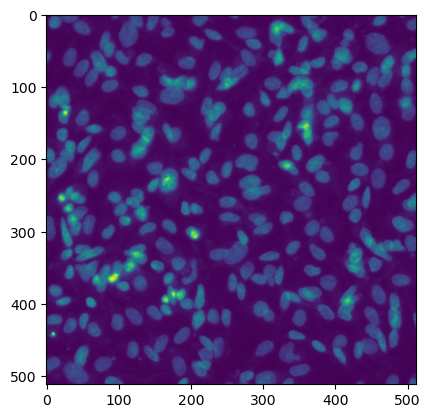

In [114]:
img = Image.open("/kaggle/input/recursion-cellular-image-classification/train/HEPG2-01/Plate1/B03_s2_w1.png")
plt.imshow(img)
plt.show()

In [ ]:
data = pd.read_csv("/kaggle/input/recursion-cellular-image-classification/train.csv")
data.shape
plt.plot(data["sirna"].value_counts())

In [ ]:
nb_rows = 30000



images = []


for i in range(nb_rows):
  try:
    channels = []
    for j in range(1,2):
        path = f"/kaggle/input/recursion-cellular-image-classification/train/{data['experiment'][i]}/Plate{data['plate'][i]}/{data['well'][i]}_s1_w"
        img = Image.open(f"{path}{j}.png")
        img = img.resize((100,100))
        img = np.array(img)
        channels.append(img)
    img_arr = np.dstack(tuple(channels))
    images.append(img_arr)
  except:
    print(f"file in row {i} doesn't exist => droppint row {i}")
    data = data.drop(i)

images = np.array(images)
print(images.shape)

In [134]:
from sklearn.model_selection import train_test_split
data = data.drop(["id_code", "experiment", "plate", "well"], axis=1)
data["sirna"] = data["sirna"].str.replace("sirna_", '')
data["sirna"] = data["sirna"].astype(int)
Y = data.head(nb_rows)
X = images
nb_classes = data["sirna"].nunique()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(nb_classes)

(3500, 100, 100, 1)
(3500, 1)
(1500, 100, 100, 1)
(1500, 1)
1108


In [5]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(100,100,1)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    
    
    Flatten(),
    
    Dense(128, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 32)       0

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, rotation_range=20, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        '/kaggle/input/recursion-cellular-image-classification/train',
        target_size=(512, 512),
        batch_size=32,
        class_mode='categorical',
        subset='training')

model.fit_generator(
        train_generator,
        epochs=5)

Found 389909 images belonging to 33 classes.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5


UnimplementedError: Graph execution error:

Detected at node 'sequential/conv2d/Relu' defined at (most recent call last):
    File "/opt/conda/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/opt/conda/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/conda/lib/python3.7/site-packages/traitlets/config/application.py", line 1041, in launch_instance
      app.start()
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/opt/conda/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/opt/conda/lib/python3.7/asyncio/base_events.py", line 541, in run_forever
      self._run_once()
    File "/opt/conda/lib/python3.7/asyncio/base_events.py", line 1786, in _run_once
      handle._run()
    File "/opt/conda/lib/python3.7/asyncio/events.py", line 88, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 387, in do_execute
      cell_id=cell_id,
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2976, in run_cell
      raw_cell, store_history, silent, shell_futures, cell_id
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
      return runner(coro)
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3258, in run_cell_async
      interactivity=interactivity, compiler=compiler, result=result)
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_27/2182767743.py", line 14, in <module>
      epochs=5)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 2618, in fit_generator
      initial_epoch=initial_epoch,
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1023, in train_step
      y_pred = self(x, training=True)
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/layers/convolutional/base_conv.py", line 314, in call
      return self.activation(outputs)
    File "/opt/conda/lib/python3.7/site-packages/keras/activations.py", line 318, in relu
      x, alpha=alpha, max_value=max_value, threshold=threshold
    File "/opt/conda/lib/python3.7/site-packages/keras/backend.py", line 5369, in relu
      x = tf.nn.relu(x)
Node: 'sequential/conv2d/Relu'
Fused conv implementation does not support grouped convolutions for now.
	 [[{{node sequential/conv2d/Relu}}]] [Op:__inference_train_function_1529]

In [137]:
model.fit(X_train, Y_train, epochs=5, validation_split=0.1)

Epoch 1/5
99/99 [==============================] - 77s 218ms/step - loss: 0.0000e+00 - accuracy: 6.3492e-04 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
99/99 [==============================] - 21s 213ms/step - loss: 0.0000e+00 - accuracy: 6.3492e-04 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/5
99/99 [==============================] - 21s 214ms/step - loss: 0.0000e+00 - accuracy: 6.3492e-04 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/5
99/99 [==============================] - 21s 207ms/step - loss: 0.0000e+00 - accuracy: 6.3492e-04 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/5
99/99 [==============================] - 21s 212ms/step - loss: 0.0000e+00 - accuracy: 6.3492e-04 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


In [138]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

47/47 [==============================] - 2s 52ms/step - loss: 0.0000e+00 - accuracy: 0.0020
Test accuracy: 0.0020000000949949026
